In [ ]:
! pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 438 kB 54.4 MB/s 
     |████████████████████████████████| 1.7 MB 55.5 MB/s 
     |████████████████████████████████| 5.9 MB 42.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.10.0


In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df= pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


here our dependent variable is exicted. as we can see here it is a bank details. we have to predict whether the customer is exited from the bank or not

In [5]:
# divide the dataset into independent and dependent features
#x= independent features, iloc means index location
X=df.iloc[:,3:13] # here we are taking 3rd column upto 12th column according to the problem statement it is not required to take 0,1,2 columns
# y= dependent variable
y=df.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:

# feature engineering
# here drop_first means it will remove the one column and and if the removed column shows 1 means other two columns will show zero 
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
# concatenate these variables with dataframe
X=pd.concat([X,geography,gender],axis=1)

In [10]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
X_test.shape

(2000, 11)

In [18]:
# 2nd part to create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #activation functions
from tensorflow.keras.layers import Dropout

In [19]:
# ANN initiazation
classifier= Sequential()

In [20]:
#adding input layer
classifier.add(Dense(units=11,activation="relu"))

In [21]:
# adding the 1st hidden layer
classifier.add(Dense(units=7,activation="relu"))


In [22]:
# adding the 2nd hidden layer
classifier.add(Dense(units=6,activation="relu"))


In [23]:
# adding the output layer
classifier.add(Dense(1,activation="sigmoid"))


In [24]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
# early stopping
# it means Stop training when a monitored metric has stopped improving.

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [28]:
# training
model_train=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 4ms/step - loss: 0.4936 - accuracy: 0.7964 - val_loss: 0.4549 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4378 - accuracy: 0.8029 - val_loss: 0.4424 - val_accuracy: 0.8092
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4268 - accuracy: 0.8160 - val_loss: 0.4377 - val_accuracy: 0.8080
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4186 - accuracy: 0.8216 - val_loss: 0.4304 - val_accuracy: 0.8129
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4079 - accuracy: 0.8246 - val_loss: 0.4218 - val_accuracy: 0.8175
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3965 - accuracy: 0.8315 - val_loss: 0.4143 - val_accuracy: 0.8164
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3868 - accuracy: 0.8343 - val_loss: 0.4052 - val_accuracy:

In [30]:
model_train.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

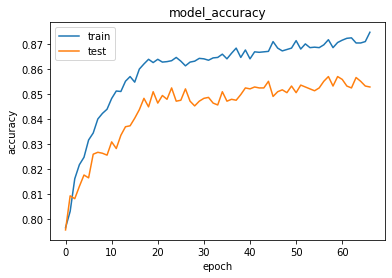

In [31]:
# sumarize history for accuracy
plt.plot(model_train.history["accuracy"])
plt.plot(model_train.history["val_accuracy"])
plt.title("model_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper left")
plt.show()

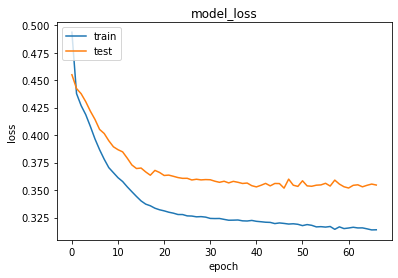

In [32]:
# sumarize history for loss
plt.plot(model_train.history["loss"])
plt.plot(model_train.history["val_loss"])
plt.title("model_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [33]:
# part3 making prediction and evaluating the model
# test data
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

In [34]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[1501,   94],
       [ 193,  212]])

In [35]:
# accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred,y_test)
score


0.8565

In [36]:
# weights
classifier.get_weights()

[array([[-0.41023824,  0.29059374, -0.09834457,  0.3103236 ,  0.2636067 ,
         -0.38758633,  0.06952144, -0.10506752, -0.29343906, -0.210281  ,
         -0.09271678],
        [ 0.01731178, -0.574165  ,  0.57441694,  0.32680765, -0.27497858,
         -0.4777748 ,  0.11929803,  0.6142886 , -0.09216692,  0.23283197,
         -0.33262473],
        [ 0.233756  ,  0.14614588, -0.02232696,  0.08177891, -0.32645044,
         -0.26564544,  0.06840853, -0.09842709, -0.25922287, -0.08362336,
         -0.07900053],
        [-0.5528698 , -0.7112714 , -0.15580097, -0.5471576 ,  0.32523382,
          0.29942092, -0.99972755, -0.20201485,  0.16483665,  0.23051952,
         -0.03653675],
        [-0.2548977 , -0.3130116 , -0.61423486, -0.20367359, -0.03517259,
         -0.2978742 , -1.2709208 ,  0.94296926, -0.33364004, -1.3272995 ,
         -0.33829793],
        [-0.24507344, -0.27065644,  0.14262252, -0.09021964, -0.34904775,
         -0.5821643 , -0.03153996, -0.13164839, -0.34571964, -0.0966907